# Teil1 der Semesterarbeit Parallelprojektionen
_Autor: Chantale Gihara_

_Abgabe: 20.10.2021_

## Einführung:

Im Rahmen des Modules Lineare Algebra haben wir folgenden Auftrag erhalten:

* Bei einer Paralleprojektione werden Punkte im Raum in einer bestimmten Richtung auf eine Ebene projiziert. Die Projektion wird definiert durch die Angabe einer Projektionsrichtung und durch die Angabe der Ebene, auf die projiziert wird.
* In dieser Aufgabe ist die Projektionsebene immer eine Parallele der xy-Ebene in eine vorgegebenen Höhe hh; diese Ebene wird im folgenden mit εh bezeichnet.
Lösen Sie die folgenden Aufgaben:
1.	Berechnen Sie für einen vorgegebenen Richtungsvektor $\vec{a}$ und eine vorgegene Höhe h die Projektion P′ eines Punktes P=(x,y,z) auf die Projektionsebene εh.
(Mit anderen Worten: berechnen Sie den Durchstosspunkt der Geraden durch P in der Richtung $\vec{a}$  mit εh.)
2.	Beschreiben Sie für einen vorgegebenen Richtungsvektor und einer vorgegebenen Höhe hh die Abbildung π$\vec{a}$ ,h:P↦P′ durch eine geeignete Abbildungsmatrix.
Erstellen Sie eine python-Funktion projektionsmatrix(richtung, h), die diese Matrix erzeugt.
3.	Für einen Streckenzug P$_{0}$,P$_{1}$,…,P$_{n}$ soll eine 3D-Graphik mit matplotlib erstellt werden, die den Streckenzug zeigt, die Projektion P′$_{0}$,P′$_{1}$,…,P′$_{n}$ des Streckenzugs auf die Ebene π$\vec{a}$,h sowie die Projektionslinien (P1 P′1) 
4. Hilfsmittel: Numpy, Matplotlib mit 3D-Toolkit, Jupyter Notebook (oder Python-IDE).

[1]

Zuerst werde ich die Theorie der Pararellprojektion beschreiben, danach versuche ich Schritt für Schritt die Funktionen in Python zu programmieren. Dafür werden matplotlib und numpy verwendet.

Dabei werde ich die Funktionen und deren Ausführung auskommentieren.

## Parallelprojektion



##### Beschreibung
Eine Parallelprojektion ist eine Abbildung von Punkten des dreidimensionalen Raums auf Punkte einer bestimmten Ebene, wobei die Projektionsstrahlen parallel zueinander verlaufen. Treffen die Projektionsstrahlen im rechten Winkel auf die Projektionsebene, handelt es sich um eine orthogonale Projektion. Eine Parallelprojektion kann als Grenzfall einer Zentralprojektion betrachtet werden, bei der das Zentrum der Projektion im Unendlichen liegt. Parallelprojektionen werden häufig verwendet, um Schrägbilder von geometrischen Körpern zu erstellen.

Um das ganze ein bisschen genauer aufzuzeigen, im folgenden die Ansichten aus verschiedenen Punktperspektiven:
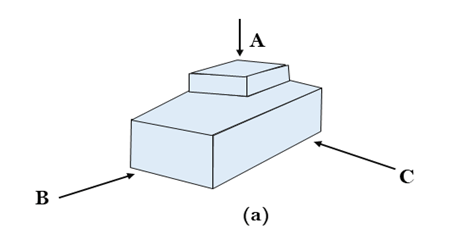
[3]

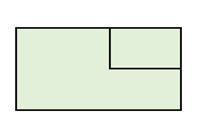
_Paralleprojektion vom Punkt A aus_

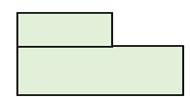
_Parallelprojektion vom Punkt B aus_

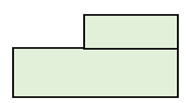
_Parallelprojektion vom Punkt C aus_



Den Bildpunkt eines beliebigen Punktes im Raum erhält man bei einer Parallelprojektion, indem man die Parallele zur Projektionsrichtung durch diesen Punkt zum Schnittpunkt mit der Projektionsebene bringt. Geraden werden im Allgemeinen durch eine Parallelprojektion auf Geraden abgebildet. Dies gilt jedoch nicht für Parallelen zur Projektionsrichtung, da diese in Punkte übergehen. Die Bildlinien von parallelen Geraden sind - soweit definiert - auch parallel zueinander. Die Länge einer Linie bleibt erhalten, wenn sie parallel zur Projektionsebene liegt. Die Grösse eines projizierten Winkels stimmt in der Regel nicht mit der Größe des ursprünglichen Winkels überein. Aus diesem Grund wird ein Rechteck im Allgemeinen auf ein Parallelogramm abgebildet, nur in Ausnahmefällen auf ein Rechteck. In ähnlicher Weise werden Kreise im Allgemeinen auf Ellipsen abgebildet.

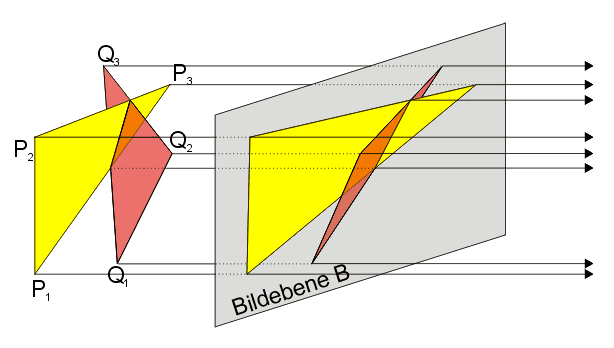


* Isometrische Projektion: Alle Projektoren bilden gleiche Winkel, im Allgemeinen einen Winkel von 30°.
* Dimetrisch: Bei diesen beiden Projektoren sind die Winkel gleich. In Bezug auf die beiden Hauptachsen.
* Trimetrisch: Die Richtung der Projektion bildet einen ungleichen Winkel mit ihrer Hauptachse.
* Kavalier: Alle Linien, die senkrecht zur Projektionsebene verlaufen, werden ohne Längenänderung projiziert.
* Kabinett: Alle Linien, die senkrecht zur Projektionsebene verlaufen, werden auf die Hälfte ihrer Länge projiziert. Dadurch wird ein realistisches Aussehen des Objekts erreicht.

Im Allgemeinen treffen die Projektionsstrahlen schräg auf die Projektionsfläche. Man spricht dann von einer schrägen oder schrägen Parallelprojektion. Beispiele hierfür sind die Kavaliersprojektion.

Die orthogonale Projektion (auch orthogonale oder orthographische Parallelprojektion genannt) wird am häufigsten verwendet. Hier treffen die Projektionsstrahlen rechtwinklig auf die Projektionsebene. 
[2]

#### Berechnung der Parallelprojektion

Bei jeder drei Projektionsarten (Vorderansicht, Draufsicht, Seitenansicht) wird jeweils eine Koordinate weggelassen. In der Draufsicht wird der Punkt P(x|y|z) auf den Punkt P′(x|y) abgebildet, in der Seitenansicht auf den Punkt P′′(y|z)
und in der Vorderansicht auf den Punkt P′′′(x|z). Die zugehörigen Matrizen sind 3×2-Matrizen.

M = $\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ \end{bmatrix}$ 

_Vorderansicht_

M = $\begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\ 
\end{bmatrix}$

_Draufsicht_

M = $\begin{bmatrix}
1 & 0 & 0 \\ 
0 & 0 & 1 \\ 
\end{bmatrix}$

_Seitenansicht_
[2]

Soll ein Punkt P durch eine Parallelprojektion mit der Projektionsrichtung ${\vec {v}}$ auf eine Ebene E:${\vec {n}}\cdot {\vec {x}}$-d=0 (in Normalform) abgebildet werden, so ist der Bildpunkt von P der Schnittpunkt der Geraden g durch P mit dem Richtungsvektor

g:${\vec  x}=\overrightarrow {OP}+\lambda {\vec  {v}},~\lambda \in {\mathbb  {R}}$

Lässt man Ebene und Gerade schneiden, so ergibt sich für den Parameter $\lambda $:

$\lambda ={\frac  {d-\overrightarrow {OP}\cdot {\vec  {n}}}{{\vec  {n}}\cdot {\vec  {v}}}}$
Setzt man diesen in die Gerade g ein, so erhält man den Schnittpunkt dieser mit E und damit den Bildpunkt P':

$\overrightarrow {OP'}=\overrightarrow {OP}+{\frac  {d-\overrightarrow {OP}\cdot {\vec  {n}}}{{\vec  {n}}\cdot {\vec  {v}}}}\cdot {\vec  {v}}$

Ist die Projektionsrichtung gleich der Normalenrichtung der Ebene (${\vec  v}$=${\vec  n}$), so erhält man als Spezialfall die Orthogonalprojektion des Punkts auf die Ebene.

[3]

#### Berechnung einer Pararellprojektion von einem Achtecken-Prisma

Anhand eines Achtpunkte-Prisma sollte eine Parallelprojektion berechnet werden:

Gegeben sind ein Achtecken Prisma welches in 3D 16 Punkte aufzeigt. Davon werden Acht Punkte P${_1}$,P${_2}, $P${_3}$, P${_4}$, P${_5}$, P${_6}$, P${_7}$, P${_8}$, P${_9}$, P$_{10}$, P$_{11}$, P$_{12}$, P$_{13}$, P$_{14}$, P$_{15}$, P$_{16}$ auf eine 3 D Ebene projeziert mit den Abbildungspunkten P'${_1}$,P'${_2}$, P'${_3}$, P'${_4}$, P'${_5}$, P'${_6}$, P'${_7}$, P'${_8}$, P'${_9}$, P'$_{10}$, P'$_{11}$, P'$_{12}$, P'$_{13}$, P'$_{14}$, P'$_{15}$, P'$_{16}$ gegeben. Der Richtungsvektor ist gegeben mit $\vec{a}$.

Die Ebene kann entweder Senkrecht, zu dem Körperliegen mit einem 90$\circ$ Winkel (ortoghonal) oder 45$\circ$ die Kavaliersprojektion, der Körper kann in irgendeinem Winkel zu der Ebene liegen.


Die Ebene wird wie folgt definiert: 

E: x*y

x und y muss je nach Schiefe und Winkel wie folgt berechnet berechnet werden: 
Punkt => Körper => Ebene:

x = x + z * ($\frac{\cos\beta}{\tan\alpha}$)

y = y + z ($\frac{\sin\beta}{\tan\alpha}$)

$\tan\alpha$ = ($\frac{z}{c}$) $=>$ c = ($\frac{\tan\alpha}{z}$)


Jetzt müssen diese 16 Punkte unter Angabe des Richtungsvektors auf die XY-Ebene parallelprojiziert werden. 

Der Abstand oder Höhe der Punkte zur Ebene XY beträgt z = h.
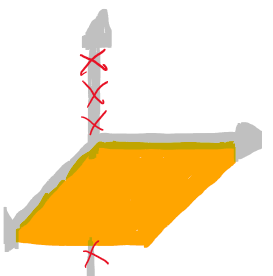
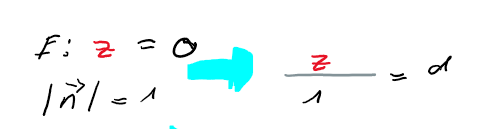

Ausgehend von den kanonischen Einheitsvektoren E1(1,0,0) und E2(0,1,0) wird nichts verändert nach der Parallelprojektion, da sie sich bereits auf der XY-Ebene befinden. Jeder projizierte Punkt wird den z-Wert = 0 haben, da er sonst nicht auf der XY-Ebene liegen würde. Dies bedeutet, die Parallelprojektion von $E_3$(0,0,1) muss P(x,y,0) sein. Nun sollte noch x und y berechnet werden. Die Parallelprojektion ist der Schnittpunkt einer Gerade mit der XY- Ebene. Diese Gerade schneidet den abzubildenden Punkt P und hat die Richtung des angegeben Richtungsvektors v. Im Falle des kanonischen Einheitsvektors mit dem Punkt P(0,0,1) und dem Richtungsvektor ($r_1$, $r_2$, $r_3$) bedeutet dies:

g:$\begin{bmatrix}
0 \\ 
0 \\ 
1 \\ 
\end{bmatrix}$ + _t_ * $\begin{bmatrix} 
r_1 \\ 
r_2 \\
r_3 \\
\end{bmatrix}$ 
Dabei ist $z$ = 0, somit ergeben isch folgende Gleichungen:

x = 0 + t * $r_1$

y = 0 + t * $r_2$

0 = 1 + t * $r_3$   $=>$ t = - ($\frac{1}{r_3}$) $=>$ $r_3$ $\ne$ 0



Den Wert für t kann in die Gleichungen für $x$ und $y$ eingesetzt werden. Nun sind alle Werte vorhanden, die für die Transformationsmatrix und deren nötigen Informationen für die Parallelprojektion auf die XY-Ebene benötigt werden. Dabei ist x und y vom gewählten Richtungsvektor abhängig:

Transformationsmatrix M = $\begin{bmatrix}
0 & 0 & x\\ 
0 & 1 & y \\
0 & 0 & 0 \\
\end{bmatrix}$

Nun muss jeder Punkt mit der Transformationsmatrix M multiplizieren werde, um den der projizierte Punkt P’ zu erhalten.

$P_1$ = (-2, 1, 9), $P_2$ = (-6, -3, 8), $P_3$ = (-6, -3, 6) $P_4$ = (-2,-1,5), $P_5$=(2, 1,5), $P_6$=(6,3,6), $P_7$=(6,3,8), $P_8$=(2,1,9), 

die Parallelpunkte des Prisma stehen gemäss Richtungsvektor $\vec  {v}$: $\begin{bmatrix}
4 \\ 
2 \\ 
-6 \\ 
\end{bmatrix}$

$P_9$ = (2, 3, 3), $P_{10}$ = (-6, -3, 8), $P_{11}$ = (-6, -3, 6) $P_{12}$ = (-2, -1, 5), $P_{13}$=(-2, 1, 5), $P_{14}$=( 6, 3, 6), $P_{15}$=(6, 3, 8), $P_{16}$=(2, 1, 9)

Richtungsvektor der Transformationsmatrix $\vec{a}$ = $\begin{bmatrix}
5 \\ 
-7 \\ 
-5 \\ 
\end{bmatrix}$

Jetzt wird X und Y = 1 in die Transformationsmatrix eingesetz gemäss dem definierten Richtungsvektor in die Gleichung eingetragen und danach wird die Matrix mit den Punkten multiplizieren und erhalte so folgende projezierten Punkten P':

t = -1 * $\frac{1}{-5}$ =  $\frac{1}{5}$

x = 5 *  $\frac{1}{5}$ = 1

y = -7 *  $\frac{1}{5}$ =  -$\frac{7}{5}$

P'$_1$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
-2 \\ 
1 \\ 
9 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
7 \\ 
9 \\ 
0 \\ 
\end{bmatrix}$ 

P'$_2$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
-6 \\ 
-3 \\ 
8 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
2 \\ 
8 \\ 
0 \\ 
\end{bmatrix}$

P'$_3$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
-6 \\ 
-3 \\ 
6 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
0 \\ 
6 \\ 
0 \\ 
\end{bmatrix}$

P'$_4$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
-2 \\ 
-1 \\ 
5 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
3 \\ 
5 \\ 
0 \\ 
\end{bmatrix}$

P'$_5$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
2 \\ 
1 \\ 
5 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
7 \\ 
5 \\ 
0 \\ 
\end{bmatrix}$

P'$_6$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
6\\ 
3 \\ 
6 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
12 \\ 
6 \\ 
0 \\ 
\end{bmatrix}$

P'$_7$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
6 \\ 
3 \\ 
8 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
14 \\ 
8 \\ 
0 \\ 
\end{bmatrix}$

P'$_8$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
2 \\ 
 1\\ 
9 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
11 \\ 
9 \\ 
0 \\ 
\end{bmatrix}$

P'$_9$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
2 \\ 
3 \\ 
3 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
5 \\ 
3 \\ 
0 \\ 
\end{bmatrix}$

P'$_{10}$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
-6 \\ 
-3 \\ 
8 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
2 \\ 
8 \\ 
0 \\ 
\end{bmatrix}$

P'$_{11}$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
-6 \\ 
-3 \\ 
6 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
0 \\ 
6 \\ 
0 \\ 
\end{bmatrix}$

P'$_{12}$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
-2 \\ 
-1 \\ 
5 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
3 \\ 
5 \\ 
0 \\ 
\end{bmatrix}$

P'${_13}$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
2 \\ 
1 \\ 
5 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
7 \\ 
5 \\ 
0 \\ 
\end{bmatrix}$

P'$_{14}$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
6 \\ 
3 \\ 
6 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
12 \\ 
6 \\ 
0 \\ 
\end{bmatrix}$

P'$_{15}$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
6 \\ 
3 \\ 
8 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
14 \\ 
8 \\ 
0 \\ 
\end{bmatrix}$

P'$_{16}$ = $\begin{bmatrix}
1 & 0 & 1\\ 
0 & 1 & - \frac{7}{5} \\
0 & 0 & 0 
\end{bmatrix}$ * $\begin{bmatrix}
2 \\ 
1 \\ 
9 \\ 
\end{bmatrix}$ = $\begin{bmatrix}
11 \\ 
9 \\ 
0 \\ 
\end{bmatrix}$

Nun haben wir alle 16 Punkten in der XY Ebene abgebildet.

#### Darstellung mit Python
Als erstes wird eine Python Klasse Parallelprojektion erstellt.
Die Python-Klasse «Parallelprojektion» wurde definiert, welche zur Instanziierung 27 Parameter benötigt: Je die x-, y, z-Werte der 8 Vektoren (zur Punkten-Bestimmung) und zusätzlich den x, y, z-Wert des Ursprungpunktes. Die Werte für den Richtungsvektor respektive der Projektion muss separat als Parameter einer Methode dieser Klasse übergeben werden. Während der Instanziierung der Klasse werden die 8 Vektoren gebildet. Danach werden alle 16 Punkte anhand der Angaben zum Startpunkt und zu den 8 Vektoren berechnet und einem Array übergeben. Die Punkte werden nach dem dreidimensionalen Koordinatensystem aufgezeichnet und mit Linien miteinander verbunden, dabei entsteht das Achtecken-Prisma. Bei der Parallelprojektion wird anhand der theoretisch beschriebenen Vorgehensweise die Transformationsmatrix, abhängig vom Richtungsvektor, berechnet. Als nächstes werden alle 16 Punkte in dem Array je mit Transformationsmatrix multipliziert, so dass die die 16 projizierten Punkte auf der XY-Ebene erscheinen. Diese werden in einem weiteren Array gespeichert und ebenfalls im Koordinatensystem aufgezeichnet und mit Linien miteinander verbunden. Um das Achtecken-Prisma gut sichtbar auf der XY-Ebene darzustellen wurde der Richtungsvektor (5, -7, 5) gewählt. (Berechnungen sind im Theorie-Teil aufgezeigt).

In [7]:
import numpy.linalg as la
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

class Parallelprojection:

    def __init__(self, ax, ay, az, bx, by, bz, cx, cy, cz, dx, dy, dz, ex, ey, ez, fx, fy, fz, gx, gy, gz, hx, hy, hz, opx, opy, opz):
        self.ax = ax
        self.ay = ay
        self.az = az
        self.bx = bx
        self.by = by
        self.bz = bz
        self.cx = cx
        self.cy = cy
        self.cz = cz
        self.dx = dx
        self.dy = dy
        self.dz = dz
        self.ex = ex
        self.ey = ey
        self.ez = ez
        self.fx = fx
        self.fy = fy
        self.fz = fz
        self.gx = gx
        self.gz = gz
        self.gy = gy
        self.hx = hx
        self.hy = hy
        self.hz = hz
        self.opx = opy
        self.opy = opy
        self.op = opz
        self.vectorA = self.createVectors(ax, ay, az)
        self.vectorB = self.createVectors(bx, by, bz)
        self.vectorC = self.createVectors(cx, cy, cz)
        self.vectorD = self.createVectors(dx, dy, dz)
        self.vectorE = self.createVectors(ex, ey, ez)
        self.vectorF = self.createVectors(fx, fy, fz)
        self.vectorG = self.createVectors(gx, gy, gz)
        self.vectorH = self.createVectors(hx, hy, hz)
        self.originPoint = self.createVectors(opx, opy, opz)

    def createVectors(self, x, y, z):
        vector = np.array([x, y, z,0, 0,0, 0, 0])
        return vector


    def defineParallPoints(self, vectorA, vectorB, vectorC, vectorD, vectorE, vectorF, vectorG, vectorH, originPoint):
        points = []
        # Ursprung: Starpunkt der drei Vektoren
        # point [0]
        p1 = [originPoint[0], originPoint[1], originPoint[2]]
        points.append(p1)
        # Punkt auf der unteren Ebene
        p2 = [vectorA[0] + p1[0], vectorA[1] + p1[1], vectorA[2] + p1[2]]
        points.append(p2)
        # point [2]
        p3 = [vectorB[0] + p2[0], vectorB[1] + p2[1], vectorB[2] + p2[2]]
        points.append(p3)
        # point [3]
        p4 = [vectorC[0] + p3[0], vectorC[1] + p3[1], vectorC[2] + p3[2]]
        points.append(p4)
        # point [4]
        p5 = [vectorD[0] + p4[0], vectorD[1] + p4[1], vectorD[2] + p4[2]]
        points.append(p5)
        # point [5]
        p6 = [vectorE[0] + p5[0], vectorE[1] + p5[1], vectorE[2] + p5[2]]
        points.append(p6)
        # point [6]
        p7 = [vectorF[0] + p6[0], vectorF[1] + p6[1], vectorF[2] + p6[2]]
        points.append(p7)
        # point [7]
        p8 = [vectorG[0] + p7[0], vectorG[1] + p7[1], vectorG[2] + p7[2]]
        points.append(p8)
        # point [8]
        p9 = [vectorH[0] + p1[0], vectorH[1] + p1[1], vectorH[2] + p1[2]]
        points.append(p9)
        # point [9]
        p10 = [vectorH[0] + p2[0], vectorH[1] + p2[1], vectorH[2] + p2[2]]
        points.append(p10)
        # point [10]
        p11 = [vectorH[0] + p3[0], vectorH[1] + p3[1], vectorH[2] + p3[2]]
        points.append(p11)
        # point [11]
        p12 = [vectorH[0] + p4[0], vectorH[1] + p4[1], vectorH[2] + p4[2]]
        points.append(p12)
        # point [12]
        p13 = [vectorH[0] + p5[0], vectorH[1] + p5[1], vectorH[2] + p5[2]]
        points.append(p13)
        # point [13]
        p14 = [vectorH[0] + p6[0], vectorH[1] + p6[1], vectorH[2] + p6[2]]
        points.append(p14)
        # point [14]
        p15 = [vectorH[0] + p7[0], vectorH[1] + p7[1], vectorH[2] + p7[2]]
        points.append(p15)
        # point [15]
        p16 = [vectorH[0] + p8[0], vectorH[1] + p8[1], vectorH[2] + p8[2]]
        points.append(p16)
        return points

    def drawLines(self, points):
        # p1 und p2 mit einer Linie verbinden:
        x = np.linspace(points[0][0], points[1][0], 100)
        y = np.linspace(points[0][1], points[1][1], 100)
        z = np.linspace(points[0][2], points[1][2], 100)
        ax.plot(x, y, z)

        # p1 und p8 mit einer Linie verbinden:
        x = np.linspace(points[0][0], points[7][0], 100)
        y = np.linspace(points[0][1], points[7][1], 100)
        z = np.linspace(points[0][2], points[7][2], 100)
        ax.plot(x, y, z)

        # p1 und p9 mit einer Linie verbinden:
        x = np.linspace(points[0][0], points[8][0], 100)
        y = np.linspace(points[0][1], points[8][1], 100)
        z = np.linspace(points[0][2], points[8][2], 100)
        ax.plot(x, y, z)

        # p2 und p3 mit einer Linie verbinden:
        x = np.linspace(points[1][0], points[2][0], 100)
        y = np.linspace(points[1][1], points[2][1], 100)
        z = np.linspace(points[1][2], points[2][2], 100)
        ax.plot(x, y, z)

        # p2 und p10 mit einer Linie verbinden:
        x = np.linspace(points[1][0], points[9][0], 100)
        y = np.linspace(points[1][1], points[9][1], 100)
        z = np.linspace(points[1][2], points[9][2], 100)
        ax.plot(x, y, z)

        # p3 und p4 mit einer Linie verbinden:
        x = np.linspace(points[2][0], points[3][0], 100)
        y = np.linspace(points[2][1], points[3][1], 100)
        z = np.linspace(points[2][2], points[3][2], 100)
        ax.plot(x, y, z)

        # p3 und p11 mit einer Linie verbinden:
        x = np.linspace(points[2][0], points[10][0], 100)
        y = np.linspace(points[2][1], points[10][1], 100)
        z = np.linspace(points[2][2], points[10][2], 100)
        ax.plot(x, y, z)

        # p4 und p5 mit einer Linie verbinden:
        x = np.linspace(points[3][0], points[4][0], 100)
        y = np.linspace(points[3][1], points[4][1], 100)
        z = np.linspace(points[3][2], points[4][2], 100)
        ax.plot(x, y, z)

        # p4 und p12 mit einer Linie verbinden:
        x = np.linspace(points[3][0], points[11][0], 100)
        y = np.linspace(points[3][1], points[11][1], 100)
        z = np.linspace(points[3][2], points[11][2], 100)
        ax.plot(x, y, z)

        # p5 und p6 mit einer Linie verbinden:
        x = np.linspace(points[4][0], points[5][0], 100)
        y = np.linspace(points[4][1], points[5][1], 100)
        z = np.linspace(points[4][2], points[5][2], 100)
        ax.plot(x, y, z)

        # p5 und p13 mit einer Linie verbinden:
        x = np.linspace(points[4][0], points[12][0], 100)
        y = np.linspace(points[4][1], points[12][1], 100)
        z = np.linspace(points[4][2], points[12][2], 100)
        ax.plot(x, y, z)

        # p6 und p7 mit einer Linie verbinden:
        x = np.linspace(points[5][0], points[6][0], 100)
        y = np.linspace(points[5][1], points[6][1], 100)
        z = np.linspace(points[5][2], points[6][2], 100)
        ax.plot(x, y, z)

        # p6 und p14 mit einer Linie verbinden:
        x = np.linspace(points[5][0], points[13][0], 100)
        y = np.linspace(points[5][1], points[13][1], 100)
        z = np.linspace(points[5][2], points[13][2], 100)
        ax.plot(x, y, z)

        # p7 und p8 mit einer Linie verbinden:
        x = np.linspace(points[6][0], points[7][0], 100)
        y = np.linspace(points[6][1], points[7][1], 100)
        z = np.linspace(points[6][2], points[7][2], 100)
        ax.plot(x, y, z)

        # p7 und p15 mit einer Linie verbinden:
        x = np.linspace(points[6][0], points[14][0], 100)
        y = np.linspace(points[6][1], points[14][1], 100)
        z = np.linspace(points[6][2], points[14][2], 100)
        ax.plot(x, y, z)

        # p8 und p16 mit einer Linie verbinden:
        x = np.linspace(points[7][0], points[15][0], 100)
        y = np.linspace(points[7][1], points[15][1], 100)
        z = np.linspace(points[7][2], points[15][2], 100)
        ax.plot(x, y, z)

        # p9 und p10 mit einer Linie verbinden:
        x = np.linspace(points[8][0], points[9][0], 100)
        y = np.linspace(points[8][1], points[9][1], 100)
        z = np.linspace(points[8][2], points[9][2], 100)
        ax.plot(x, y, z)

        # p10 und p11 mit einer Linie verbinden:
        x = np.linspace(points[9][0], points[10][0], 100)
        y = np.linspace(points[9][1], points[10][1], 100)
        z = np.linspace(points[9][2], points[10][2], 100)
        ax.plot(x, y, z)

        # p11 und p12 mit einer Linie verbinden:
        x = np.linspace(points[10][0], points[11][0], 100)
        y = np.linspace(points[10][1], points[11][1], 100)
        z = np.linspace(points[10][2], points[11][2], 100)
        ax.plot(x, y, z)

        # p12 und p13 mit einer Linie verbinden:
        x = np.linspace(points[11][0], points[12][0], 100)
        y = np.linspace(points[11][1], points[12][1], 100)
        z = np.linspace(points[11][2], points[12][2], 100)
        ax.plot(x, y, z)

        # p13 und p14 mit einer Linie verbinden:
        x = np.linspace(points[12][0], points[13][0], 100)
        y = np.linspace(points[12][1], points[13][1], 100)
        z = np.linspace(points[12][2], points[13][2], 100)
        ax.plot(x, y, z)

        # p14 und p15 mit einer Linie verbinden:
        x = np.linspace(points[13][0], points[14][0], 100)
        y = np.linspace(points[13][1], points[14][1], 100)
        z = np.linspace(points[13][2], points[14][2], 100)
        ax.plot(x, y, z)

        # p15 und p16 mit einer Linie verbinden:
        x = np.linspace(points[14][0], points[15][0], 100)
        y = np.linspace(points[14][1], points[15][1], 100)
        z = np.linspace(points[14][2], points[15][2], 100)
        ax.plot(x, y, z)

        # p9 und p16 mit einer Linie verbinden:
        x = np.linspace(points[8][0], points[15][0], 100)
        y = np.linspace(points[8][1], points[15][1], 100)
        z = np.linspace(points[8][2], points[15][2], 100)
        ax.plot(x, y, z)

    def transformedM(self, direction_x, direction_y, direction_z):
        directionVector = np.array([direction_x, direction_y, direction_z])
        # directionz darf nicht null sein:
        if (direction_z != 0):
            # Versuch, die Unbekannte x, y und t herauszufinden
            t = -1 * 1 / direction_z
            x = t * direction_x
            y = t * direction_y
            # erste beiden Vektoren immer so, weil wir auf xy-Ebene projizieren
            # letzter Vektor abhängig von der Richtung
            transformedMatrix = np.array([[1, 0, x], [0, 1, y], [0, 0, 0]])
            return transformedMatrix
        else:
            return []


Instanz zur Klasse Parallelprojektion
Zuerst wird hier das 3-D Prisma dargestellt:

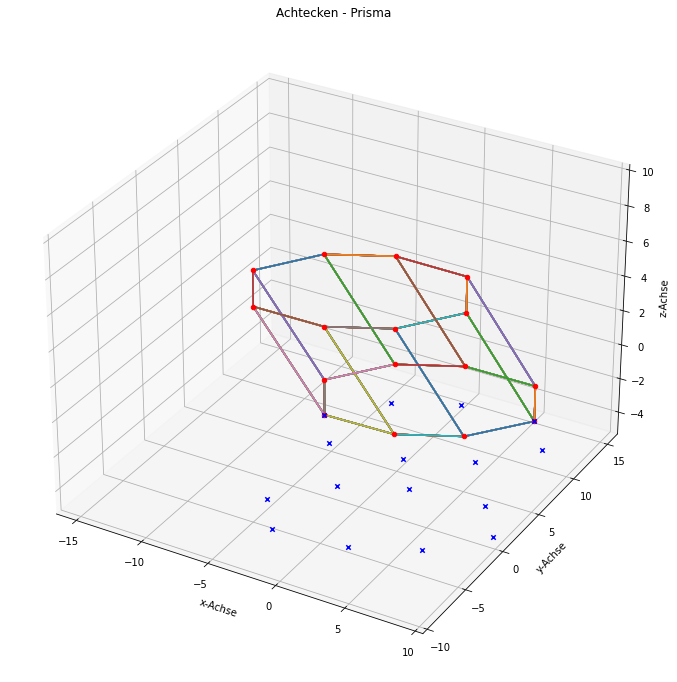

In [8]:
parallelProjection = Parallelprojection( -4, -2, -1, 0, 0,-2, 4, 2, -1, 4,2,0, 4,2,1,0,0,2,-4,-2,1,4, 2, -6,-2, -1, 9)

points = parallelProjection.defineParallPoints(parallelProjection.vectorA, parallelProjection.vectorB, parallelProjection.vectorC, parallelProjection.vectorD,parallelProjection.vectorE,parallelProjection.vectorF,parallelProjection.vectorG,parallelProjection.vectorH,parallelProjection.originPoint)
# plot the points in 3D
fig = plt.figure(figsize=(15, 12))
ax = plt.axes(projection='3d')
# Punkten die x, y und z-Werte angeben:
for p in points:
    ax.scatter(p[0], p[1], p[2], c='r', marker='o')
    parallelProjection.drawLines(points)

# Hier wird der Richtungsvektor gesetzt
transformationM = parallelProjection.transformedM(5,-7, -5)

if (transformationM != []):
    pointsProj = []

    for p in points:
        point_proj = transformationM.dot(p)
        pointsProj.append(point_proj)
    # ich muss von allen projizierten Punkten die x, y und z-Werte angeben:
    for p in pointsProj:
        ax.scatter(p[0], p[1], p[2], c='b', marker='x')
    #parallelProjection.drawLines(pointsProj)
    

    ax.set_title('Achtecken - Prisma')
    ax.set_xlabel('x-Achse', fontsize=10)
    ax.set_ylabel('y-Achse', fontsize=10)
    ax.set_zlabel('z-Achse', fontsize=10)
    ax.set_xlim3d(-16, 10)
    ax.set_ylim3d(-10, 16)
    ax.set_zlim3d(-5, 10)
    plt.show()
else:
    print('the z value of the direction vector cannot be zero!')

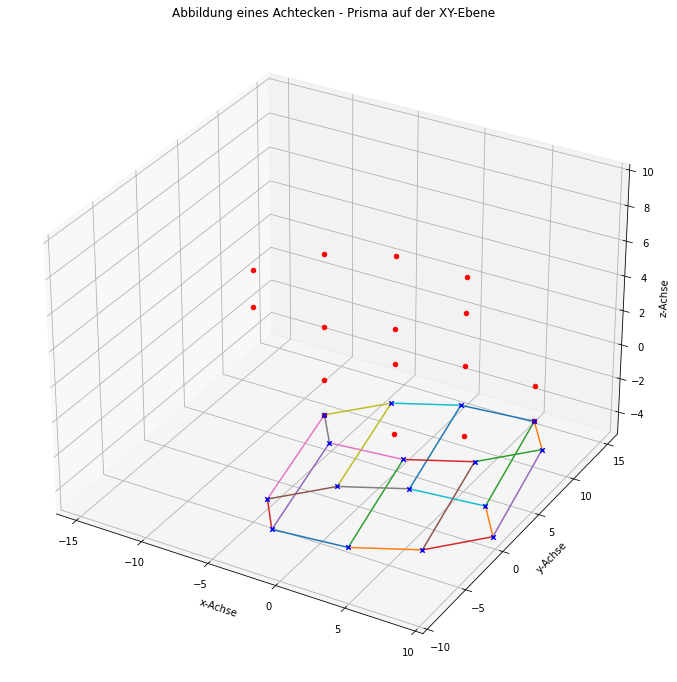

In [9]:
parallelProjection = Parallelprojection( -4, -2, -1, 0, 0,-2, 4, 2, -1, 4,2,0, 4,2,1,0,0,2,-4,-2,1,4, 2, -6,-2, -1, 9)

points = parallelProjection.defineParallPoints(parallelProjection.vectorA, parallelProjection.vectorB, parallelProjection.vectorC, parallelProjection.vectorD,parallelProjection.vectorE,parallelProjection.vectorF,parallelProjection.vectorG,parallelProjection.vectorH,parallelProjection.originPoint)
# plot the points in 3D
fig = plt.figure(figsize=(15, 12))
ax = plt.axes(projection='3d')
# Punkten die x, y und z-Werte angeben:
for p in points:
    ax.scatter(p[0], p[1], p[2], c='r', marker='o')
    #parallelProjection.drawLines(points)

# Hier wird der Richtungsvektor gesetzt
transformationM = parallelProjection.transformedM(5,-7, -5)

if (transformationM != []):
    pointsProj = []

    for p in points:
        point_proj = transformationM.dot(p)
        pointsProj.append(point_proj)
    # ich muss von allen projizierten Punkten die x, y und z-Werte angeben:
    for p in pointsProj:
        ax.scatter(p[0], p[1], p[2], c='b', marker='x')
    parallelProjection.drawLines(pointsProj)
    

    ax.set_title('Abbildung eines Achtecken - Prisma auf der XY-Ebene')
    ax.set_xlabel('x-Achse', fontsize=10)
    ax.set_ylabel('y-Achse', fontsize=10)
    ax.set_zlabel('z-Achse', fontsize=10)
    ax.set_xlim3d(-16, 10)
    ax.set_ylim3d(-10, 16)
    ax.set_zlim3d(-5, 10)
    plt.show()
else:
    print('the z value of the direction vector cannot be zero!')

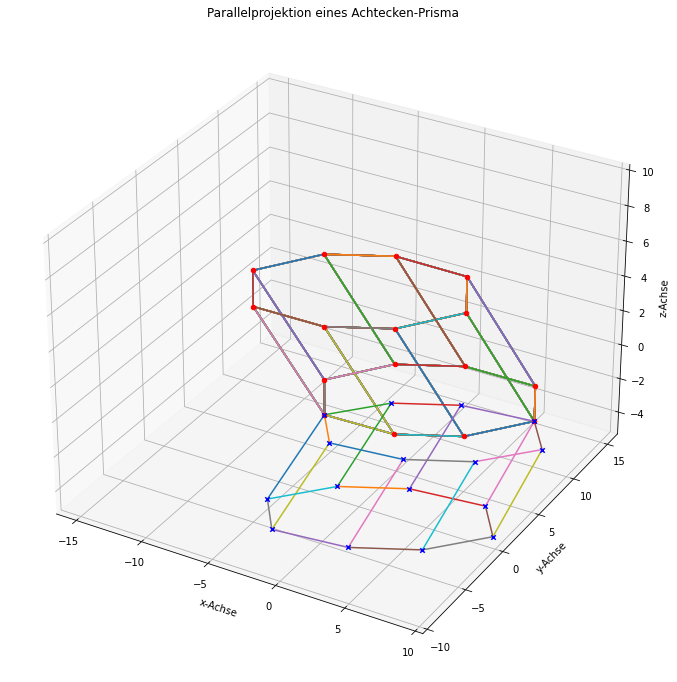

In [10]:
parallelProjection = Parallelprojection( -4, -2, -1, 0, 0,-2, 4, 2, -1, 4,2,0, 4,2,1,0,0,2,-4,-2,1,4, 2, -6,-2, -1, 9)

points = parallelProjection.defineParallPoints(parallelProjection.vectorA, parallelProjection.vectorB, parallelProjection.vectorC, parallelProjection.vectorD,parallelProjection.vectorE,parallelProjection.vectorF,parallelProjection.vectorG,parallelProjection.vectorH,parallelProjection.originPoint)
# plot the points in 3D
fig = plt.figure(figsize=(15, 12))
ax = plt.axes(projection='3d')
# Punkten die x, y und z-Werte angeben:
for p in points:
    ax.scatter(p[0], p[1], p[2], c='r', marker='o')
    parallelProjection.drawLines(points)

# Hier wird der Richtungsvektor gesetzt
transformationM = parallelProjection.transformedM(5,-7, -5)

if (transformationM != []):
    pointsProj = []

    for p in points:
        point_proj = transformationM.dot(p)
        pointsProj.append(point_proj)
    # ich muss von allen projizierten Punkten die x, y und z-Werte angeben:
    for p in pointsProj:
        ax.scatter(p[0], p[1], p[2], c='b', marker='x')
    parallelProjection.drawLines(pointsProj)
    

    ax.set_title('Parallelprojektion eines Achtecken-Prisma')
    ax.set_xlabel('x-Achse', fontsize=10)
    ax.set_ylabel('y-Achse', fontsize=10)
    ax.set_zlabel('z-Achse', fontsize=10)
    ax.set_xlim3d(-16, 10)
    ax.set_ylim3d(-10, 16)
    ax.set_zlim3d(-5, 10)
    plt.show()
else:
    print('the z value of the direction vector cannot be zero!')

### Diskussion





Die Projektion von 3D auf 2D ist sehr interessant. Durch diese Arbeit wurde aufgezeigt, wie Körper (Avatare) beispielsweise in Spielen projiziert werden können. Die Schwierigkeit war darin das 3D Prisma darzustellen, das diese mehrere Vektoren hatte um die Parallelpunkte zu zeichnen und in Python müssen quadratische Matrizen gleicher Dimension verwendet werden. Eine sehr aufwändige Arbeit, die für mich sehr viel Klarheit geschaffen hat.

## Quellen
[1] Moodle FFHS, https://moodle.ffhs.ch, verfügbar bei, https://moodle.ffhs.ch/mod/assign/view.php?id=3892120, [Zugriff:05.10.2021]

[2] Mathematik für Informatiker, _Rolf Socher_, _2011_, Verlag Fachbuchverlag Leipzig im Carl Hanser Verlag

[3] wikideck,https://wp-de.wikideck.com/,[online] verfügbar bei, https://wp-de.wikideck.com/Parallelprojektion, [Zugriff: 05.10.2021]

[4] PH-Freiburg, https://home.ph-freiburg.de, [online] verfügbar bei, https://home.ph-freiburg.de/deisslerfr/geometrie_II/sicher_geoII_06_07/Kapitel_4_06-07.pdf, [Zugriff: 05.10.2021]

[5] gertingold, https://gertingold.github.io/, verfügbar bei, https://gertingold.github.io/pythonnawi/graphics.html, [Zugriff: 05.10.2021]

[6] dartbrains, https://dartbrains.org [online] verfügbar bei, https://dartbrains.org/content/Preprocessing.html, [Zugriff: 18.10.2021]